# **Python** Equity Market **Outlier Detection Framework**

"Stock market **anomaly detection** is a critical task in financial analysis, involving the identification of irregular patterns or behaviors in **stock market data** that deviate significantly from the expected norm. These **anomalies**, often unexpected, can trigger substantial price movements or unusual trading volumes, making them essential signals for investors and analysts alike. If you're keen on mastering the art of detecting, analyzing, and interpreting **anomalies** in the **stock market**, this article is tailored just for you. Here, I'll delve into the intricacies of employing **Python** to build a robust framework for detecting **outliers** in equity markets.

Elucidating the **Stock Market Anomaly Detection** Process:

Understanding **anomalies** in the **stock market** holds immense significance as they can unveil lucrative opportunities or looming risks. A sudden surge in a stock's price, for instance, might stem from favorable news about the company or its sector, signaling a promising investment prospect. Conversely, an abrupt price decline may hint at underlying concerns or shifts in market sentiment, prompting investors to exercise caution.

### Workflow for conducting **stock market anomaly detection**:

1. **Data Collection**: Begin by amassing historical **stock market data** encompassing various metrics such as open, high, low, close, and adjusted close prices, alongside trading volumes.

2. **Feature Engineering**: Develop additional features that could facilitate **anomaly detection**, such as moving averages, relative strength index (RSI), or percentage changes over specific time intervals.

3. **Data Visualization**: Employ visualization techniques to discern potential **outliers** or irregular patterns across temporal data.

4. **Statistical Analysis**: Leverage statistical methods like Z-score analysis, wherein data points deviating by a certain number of standard deviations from the mean are flagged as **anomalies**.

5. **Utilization of Insights**: Utilize the insights garnered from **anomaly detection** to inform investment decisions, refine risk management strategies, and shape long-term strategic planning.

For this tutorial, we'll be leveraging real-time **stock market data** sourced through the yfinance API. However, should you require a dataset for experimentation, one can be downloaded from the provided link.

Fetching Real-time **Stock Market Data** using **Python**:

To kickstart our endeavor in **Stock Market Anomaly Detection**, we'll first gather real-time **stock market data** for multiple companies. To accomplish this task seamlessly, we'll harness the capabilities of the yfinance API, a versatile tool tailored for this precise purpose."

In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import yfinance as yf
from datetime import date, timedelta

try:
    # define the time period for the data
    end_date = date.today().strftime("%Y-%m-%d")
    start_date = (date.today() - timedelta(days=365)).strftime("%Y-%m-%d")

    # list of stock tickers to download
    tickers = ['AAPL', 'MSFT', 'NFLX', 'GOOG', 'TSLA']

    # download stock data
    data = yf.download(tickers, start=start_date, end=end_date, progress=False)

    # reset index to bring Date into the columns for the melt function
    data = data.reset_index()

    # melt the DataFrame to make it long format where each row is a unique combination of Date, Ticker, and attributes
    data_melted = data.melt(id_vars=['Date'], var_name=['Attribute', 'Ticker'])

    # pivot the melted DataFrame to have the attributes (Open, High, Low, etc.) as columns
    data_pivoted = data_melted.pivot_table(index=['Date', 'Ticker'], columns='Attribute', values='value', aggfunc='first')

    # reset index to turn multi-index into columns
    stock_data = data_pivoted.reset_index()

    print(stock_data.head())

except Exception as e:
    print("An error occurred:", e)


Attribute       Date Ticker   Adj Close       Close        High         Low  \
0         2023-04-10   AAPL  161.169739  162.029999  162.029999  160.080002   
1         2023-04-10   GOOG  106.949997  106.949997  107.970001  105.599998   
2         2023-04-10   MSFT  287.034210  289.390015  289.600006  284.709991   
3         2023-04-10   NFLX  338.989990  338.989990  339.880005  333.359985   
4         2023-04-10   TSLA  184.509995  184.509995  185.100006  176.110001   

Attribute        Open       Volume  
0          161.419998   47716900.0  
1          107.389999   19741500.0  
2          289.209991   23103000.0  
3          335.269989    2657900.0  
4          179.940002  142154600.0  


The dataset we've collected contains the following attributes:

- **Date**: Indicates the date of the stock data entry.
- **Ticker**: Represents the stock **ticker symbol**.
- **Adj Close**: Denotes the adjusted **closing price** of the stock, accounting for corporate actions such as **splits** or **dividends**.
- **Close**: Reflects the **closing price** of the stock.
- **High**: Represents the **highest price** of the stock observed during the **trading day**.
- **Low**: Indicates the **lowest price** of the stock recorded during the **trading day**.
- **Open**: Signifies the **opening price** of the stock.
- **Volume**: Represents the total number of **shares traded** throughout the day.

In [4]:
# convert the 'Date' column to datetime format
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

# set the 'Date' column as the index of the dataframe
stock_data.set_index('Date', inplace=True)
print(stock_data.head())


Attribute  Ticker   Adj Close       Close        High         Low        Open  \
Date                                                                            
2023-04-10   AAPL  161.169739  162.029999  162.029999  160.080002  161.419998   
2023-04-10   GOOG  106.949997  106.949997  107.970001  105.599998  107.389999   
2023-04-10   MSFT  287.034210  289.390015  289.600006  284.709991  289.209991   
2023-04-10   NFLX  338.989990  338.989990  339.880005  333.359985  335.269989   
2023-04-10   TSLA  184.509995  184.509995  185.100006  176.110001  179.940002   

Attribute        Volume  
Date                     
2023-04-10   47716900.0  
2023-04-10   19741500.0  
2023-04-10   23103000.0  
2023-04-10    2657900.0  
2023-04-10  142154600.0  


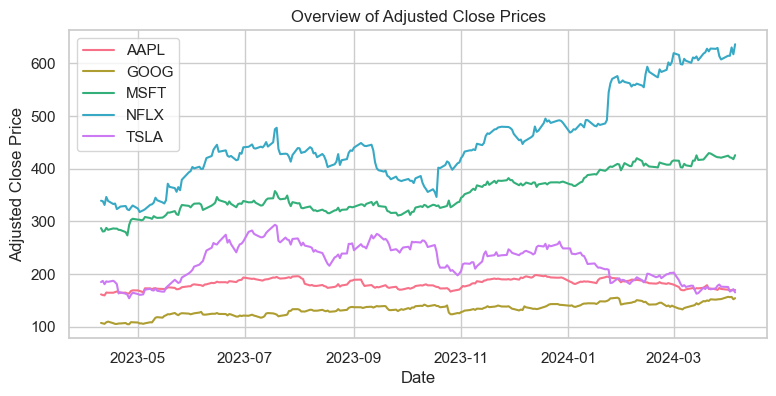

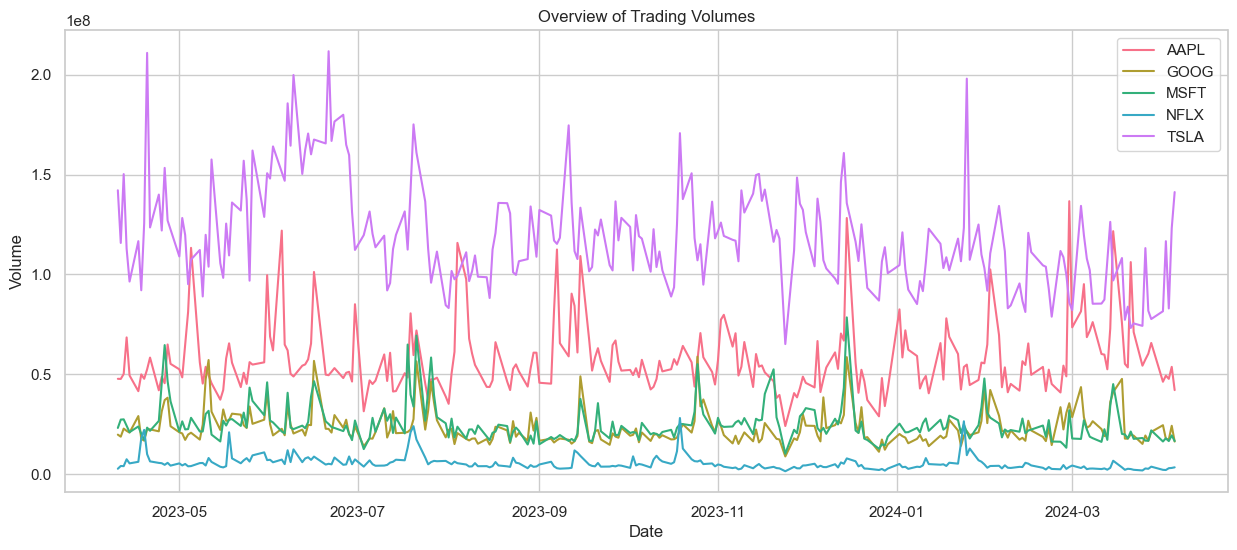

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# Define a color palette for the plots
colors = sns.color_palette("husl", len(stock_data['Ticker'].unique()))

# Plotting the adjusted close prices for each ticker over time
plt.figure(figsize=(9, 4))
for i, ticker in enumerate(stock_data['Ticker'].unique()):
    subset = stock_data[stock_data['Ticker'] == ticker]
    plt.plot(subset.index, subset['Adj Close'], label=ticker, color=colors[i])

plt.title('Overview of Adjusted Close Prices')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()

# Plotting the trading volume for each ticker over time
plt.figure(figsize=(15, 6))
for i, ticker in enumerate(stock_data['Ticker'].unique()):
    subset = stock_data[stock_data['Ticker'] == ticker]
    plt.plot(subset.index, subset['Volume'], label=ticker, color=colors[i])

plt.title('Overview of Trading Volumes')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()


In the first graph depicting the adjusted closing prices of five different stocks—AAPL (Apple Inc.), GOOG (Alphabet Inc.), MSFT (Microsoft Corporation), NFLX (Netflix, Inc.), and TSLA (Tesla, Inc.)—several observations can be made. GOOG exhibits the highest price and showcases a general uptrend throughout the period, albeit with some volatility. TSLA and AAPL also show an uptrend, with AAPL's stock price rising more steadily. Conversely, MSFT and NFLX demonstrate relatively lower prices, with NFLX experiencing considerable fluctuation but remaining mostly flat, while MSFT displays a slight downtrend towards the end of the period.

Moving on to the second graph, it becomes evident that AAPL and TSLA possess the highest and most volatile trading volumes, with TSLA experiencing particularly significant spikes. These spikes suggest notable investor interest or reactions to events during those periods. Despite GOOG having the highest stock price, its trading volume remains moderate and relatively stable. On the other hand, MSFT and NFLX exhibit lower and less volatile trading volumes compared to AAPL and TSLA. The fluctuations in trading volumes could correspond to earnings reports, product announcements, or other market-moving events for these companies.

# Transitioning to the task of Equity Market **Outlier Detection, our focus lies in identifying:

1. **Significant price movements** deviating from the stock's typical price range or trend.
2. **Unusual trading volumes** standing out from the normal trading activity.

For this purpose, we'll employ the Z-score method, a statistical technique that identifies anomalies based on how many standard deviations a data point is from the mean. Typically, a Z-score greater than 2 or less than -2 serves as the threshold for identifying an anomaly, indicating data points that are more than 2 standard deviations away from the mean.

Our approach involves computing Z-scores for both the adjusted close prices and trading volumes for each stock, subsequently identifying any data points surpassing this threshold. This method allows us to pinpoint potential anomalies warranting further investigation within the stock market data.

In [10]:
from scipy.stats import zscore

def detect_anomalies(df, column):
    df_copy = df.copy()

    # Calculate Z-scores and add them as a new column
    df_copy['Z-score'] = zscore(df_copy[column])

    # Find where the absolute Z-score is greater than 2 (common threshold for anomalies)
    anomalies = df_copy[abs(df_copy['Z-score']) > 2]
    return anomalies

anomalies_adj_close = pd.DataFrame()
anomalies_volume = pd.DataFrame()

for ticker in stock_data['Ticker'].unique():
    data_ticker = stock_data[stock_data['Ticker'] == ticker]

    adj_close_anomalies = detect_anomalies(data_ticker, 'Adj Close')
    volume_anomalies = detect_anomalies(data_ticker, 'Volume')

    # Use concat instead of append
    anomalies_adj_close = pd.concat([anomalies_adj_close, adj_close_anomalies])
    anomalies_volume = pd.concat([anomalies_volume, volume_anomalies])

print(anomalies_adj_close.head())


Attribute  Ticker   Adj Close       Close        High         Low        Open  \
Date                                                                            
2023-04-10   AAPL  161.169739  162.029999  162.029999  160.080002  161.419998   
2023-04-11   AAPL  159.946259  160.800003  162.360001  160.509995  162.350006   
2023-04-12   AAPL  159.250000  160.100006  162.059998  159.779999  161.220001   
2023-04-10   GOOG  106.949997  106.949997  107.970001  105.599998  107.389999   
2023-04-11   GOOG  106.120003  106.120003  107.220001  105.279999  106.919998   

Attribute       Volume   Z-score  
Date                              
2023-04-10  47716900.0 -2.140728  
2023-04-11  47644200.0 -2.275332  
2023-04-12  50133100.0 -2.351933  
2023-04-10  19741500.0 -2.104352  
2023-04-11  18721300.0 -2.173283  


#### The scatter plots below is to depict anomalies detected in both adjusted close prices and trading volumes. 
Each point on the scatter plot represents an anomaly detected in the respective dataset. Anomalies in adjusted close prices are marked in red, while anomalies in trading volumes are marked in blue. The x-axis of the plot corresponds to the date, indicating when each anomaly occurred, while the y-axis represents the value of either adjusted close prices or trading volumes. By visually representing anomalies in this manner, analysts can easily identify significant deviations from the expected behavior of stock prices and trading volumes over time. This visualization aids in understanding the nature and timing of anomalies, providing valuable insights for further investigation and analysis in the realm of stock market anomaly detection.

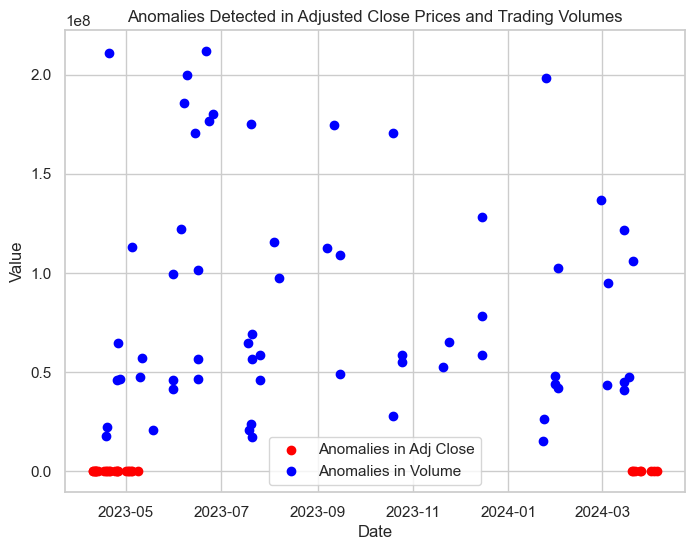

In [12]:
import matplotlib.pyplot as plt

# Create scatter plots for anomalies in adjusted close prices and trading volumes
plt.figure(figsize=(8, 6))

# Anomalies in adjusted close prices
plt.scatter(anomalies_adj_close.index, anomalies_adj_close['Adj Close'], color='red', label='Anomalies in Adj Close')

# Anomalies in trading volumes
plt.scatter(anomalies_volume.index, anomalies_volume['Volume'], color='blue', label='Anomalies in Volume')

plt.title('Anomalies Detected in Adjusted Close Prices and Trading Volumes')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


In [13]:
print(anomalies_volume.head())

Attribute  Ticker   Adj Close       Close        High         Low        Open  \
Date                                                                            
2023-05-05   AAPL  172.648468  173.570007  174.300003  170.759995  170.979996   
2023-05-31   AAPL  176.552795  177.250000  179.350006  176.759995  177.330002   
2023-06-05   AAPL  178.873611  179.580002  184.949997  178.039993  182.630005   
2023-06-16   AAPL  184.192612  184.919998  186.990005  184.270004  186.729996   
2023-08-04   AAPL  181.274155  181.990005  187.380005  181.919998  185.520004   

Attribute        Volume   Z-score  
Date                               
2023-05-05  113316400.0  3.243334  
2023-05-31   99625300.0  2.448999  
2023-06-05  121946500.0  3.744038  
2023-06-16  101235600.0  2.542426  
2023-08-04  115799700.0  3.387411  


 # Visualization of Anomalies in Adjusted Close Prices and Trading Volumes for Each Ticker.

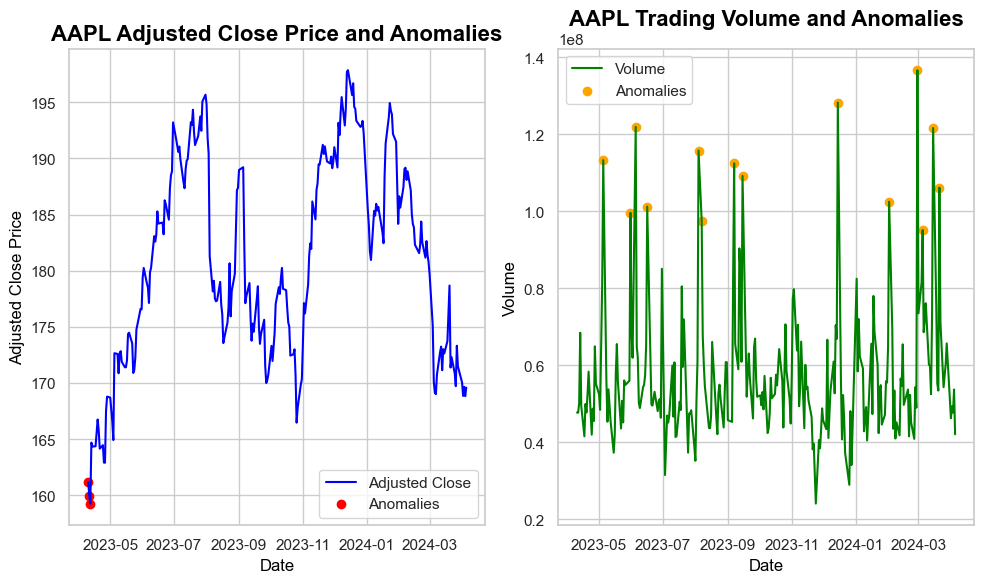

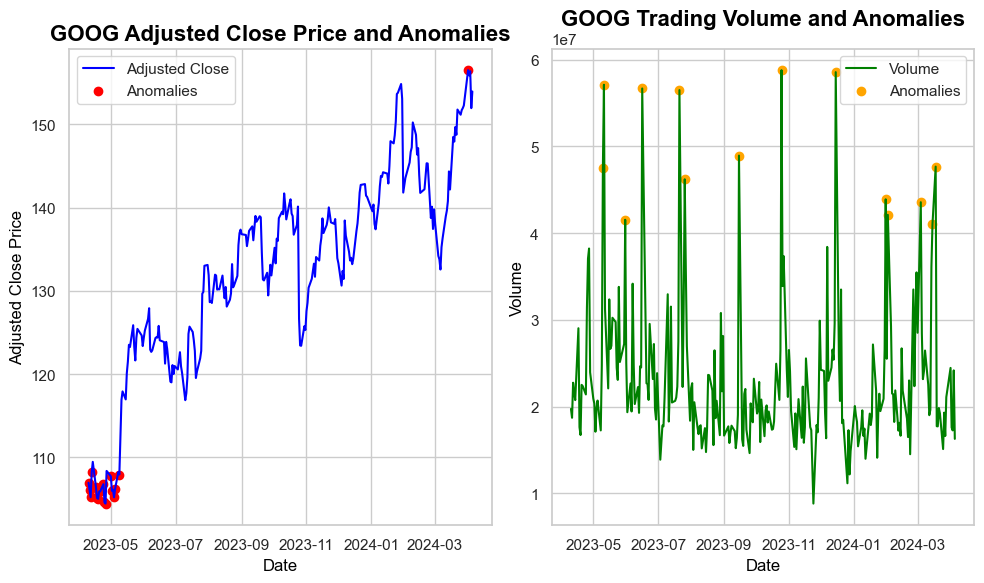

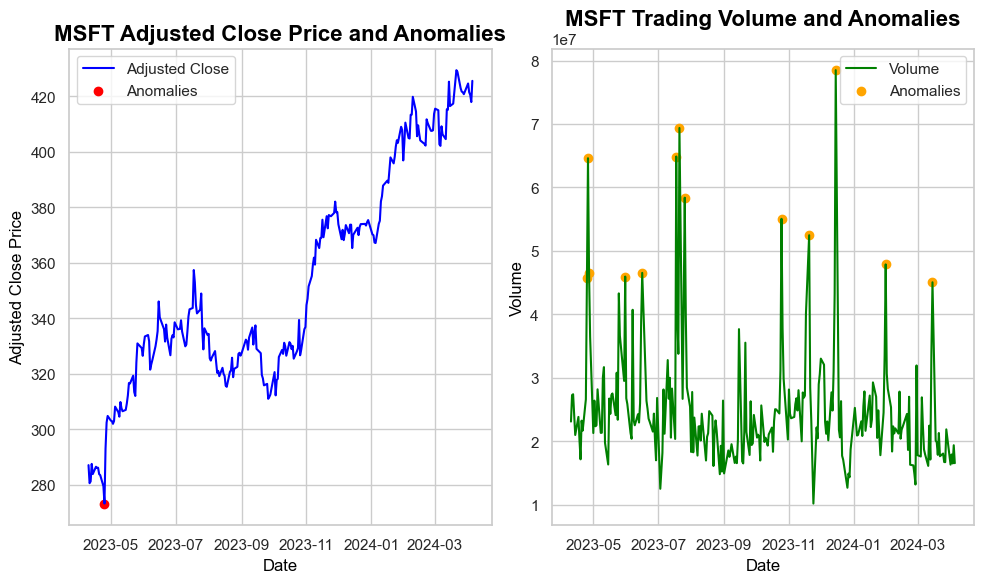

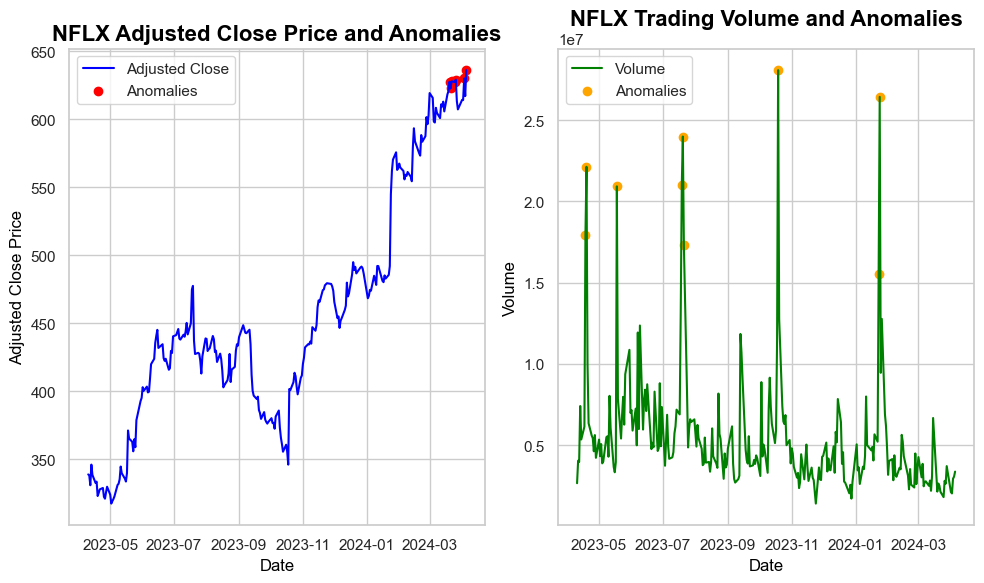

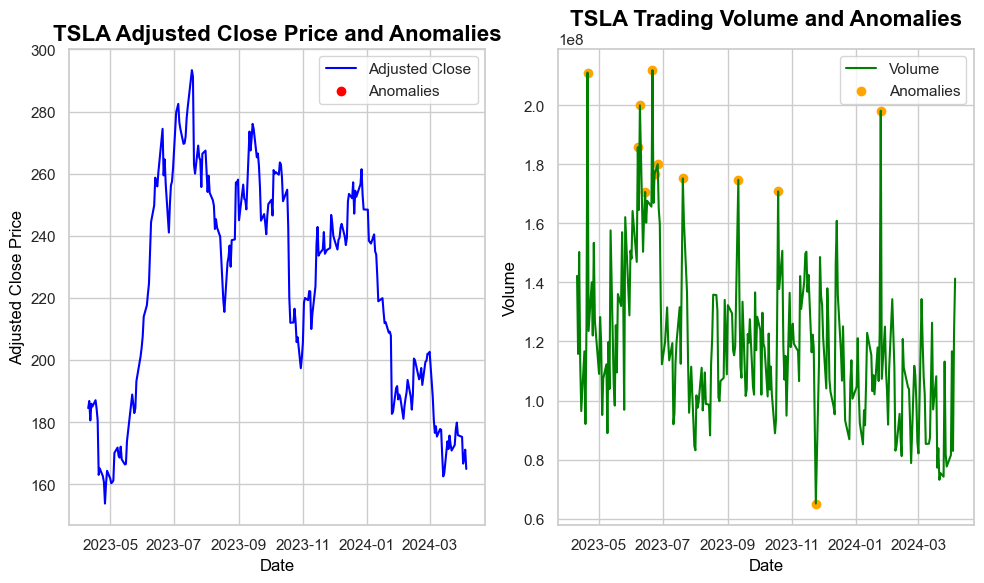

In [37]:
def plot_anomalies_adj_close_and_volume(ticker, data_ticker, adj_close_anomalies, volume_anomalies):
    fig, axes = plt.subplots(1, 2, figsize=(10, 6))

    # Plot adjusted close prices with anomalies
    axes[0].plot(data_ticker.index, data_ticker['Adj Close'], label='Adjusted Close', color='blue')
    axes[0].scatter(adj_close_anomalies.index, adj_close_anomalies['Adj Close'], color='red', label='Anomalies')
    axes[0].set_title(f'{ticker} Adjusted Close Price and Anomalies', fontsize=16, fontweight='bold', color='black')
    axes[0].set_xlabel('Date', fontsize=12, color='black')
    axes[0].set_ylabel('Adjusted Close Price', fontsize=12, color='black')
    axes[0].legend()

    # Plot trading volumes with anomalies
    axes[1].plot(data_ticker.index, data_ticker['Volume'], label='Volume', color='green')
    axes[1].scatter(volume_anomalies.index, volume_anomalies['Volume'], color='orange', label='Anomalies')
    axes[1].set_title(f'{ticker} Trading Volume and Anomalies', fontsize=16, fontweight='bold', color='black')
    axes[1].set_xlabel('Date', fontsize=12, color='black')
    axes[1].set_ylabel('Volume', fontsize=12, color='black')
    axes[1].legend()

    plt.tight_layout()
    plt.show()

# Plot anomalies for each ticker
for ticker in stock_data['Ticker'].unique():
    data_ticker = stock_data[stock_data['Ticker'] == ticker]
    adj_close_anomalies = anomalies_adj_close[anomalies_adj_close['Ticker'] == ticker]
    volume_anomalies = anomalies_volume[anomalies_volume['Ticker'] == ticker]
    plot_anomalies_adj_close_and_volume(ticker, data_ticker, adj_close_anomalies, volume_anomalies)


In each subplot:
- The left axis displays the **adjusted close prices** of the ticker over time. This line plot provides insights into the **historical trend** of **stock prices**.
- The right axis shows the **trading volumes** associated with the same ticker across the corresponding **time period**. This line plot indicates the level of **market activity** or **liquidity** for the stock.

Additionally, anomalies detected in the data are **highlighted**:
- Anomalies in **adjusted close prices** are marked in **red** on the left subplot.
- Anomalies in **trading volumes** are marked in **orange** on the right subplot.

Both subplots share common axes:
- The **x-axis** represents **time**, with each data point corresponding to a specific **date**.
- The **y-axis** denotes the values of either **adjusted close prices** or **trading volumes**.

This visualization layout facilitates a comprehensive comparison of anomalies in both **adjusted close prices** and **trading volumes** for each **ticker**. Analysts can quickly identify and analyze **anomalous behavior** in the stock market data, enabling **informed decision-making** and further investigation into potential **market abnormalities**.


### What charts says!

The provided charts offer a comprehensive view of the **adjusted close prices** and **trading volumes** for each company over a specified period. These visualizations serve as valuable tools for analyzing stock market trends and identifying potential anomalies.

In the charts, **anomalies** are denoted by distinctive markers, specifically **red** for anomalies in **adjusted close prices** and **orange** for anomalies in **trading volumes**. These anomalies represent instances where the observed data points deviate significantly from the expected or typical values.

**Anomalies** in **adjusted close prices** indicate notable deviations from the usual price range of a stock. Such deviations often coincide with significant market events, unexpected news releases, or financial reports that influence investor sentiment and trading activity. For example, a sudden surge in a stock's price might occur following a positive earnings announcement or the unveiling of a new product, while a sharp decline could be triggered by adverse economic indicators or regulatory developments.

On the other hand, **anomalies** in **trading volume** highlight days with exceptionally high or low levels of market activity compared to the norm. These anomalies often reflect shifts in investor sentiment, heightened interest in a particular stock, or significant market-moving events. For instance, a sudden increase in trading volume may coincide with a major corporate announcement, such as a merger or acquisition, while a sharp decrease could occur during periods of low market volatility or holiday seasons.

By pinpointing these **anomalies** in **adjusted close prices** and **trading volumes**, investors and analysts can gain valuable insights into market dynamics and anticipate potential fluctuations in stock prices. Moreover, understanding the underlying reasons behind these anomalies enables stakeholders to make more informed investment decisions, manage risks effectively, and capitalize on emerging opportunities in the dynamic landscape of the stock market.

# Consolidating Anomalies and Calculating Correlation Matrix

In [38]:
# Create indicator variables for anomalies in adjusted close prices and trading volumes
all_anomalies_adj_close = anomalies_adj_close[['Ticker']].copy()
all_anomalies_adj_close['Adj Close Anomaly'] = 1  

all_anomalies_volume = anomalies_volume[['Ticker']].copy()
all_anomalies_volume['Volume Anomaly'] = 1  

# Pivot these dataframes to have one row per date and columns for each ticker, filling non-anomalies with 0
adj_close_pivot = all_anomalies_adj_close.pivot_table(index=all_anomalies_adj_close.index, columns='Ticker',
                                                       fill_value=0, aggfunc='sum')

volume_pivot = all_anomalies_volume.pivot_table(index=all_anomalies_volume.index, columns='Ticker',
                                                fill_value=0, aggfunc='sum')

# Flatten the multi-level column index
adj_close_pivot.columns = adj_close_pivot.columns.get_level_values(1)
volume_pivot.columns = volume_pivot.columns.get_level_values(1)

# Combine the two pivoted dataframes
combined_anomalies = pd.concat([adj_close_pivot, volume_pivot], axis=1, keys=['Adj Close Anomaly', 'Volume Anomaly'])

# Calculate the correlation matrix for the anomalies
correlation_matrix = combined_anomalies.corr()

print(correlation_matrix)


                         Adj Close Anomaly                                \
Ticker                                AAPL      GOOG      MSFT      NFLX   
                  Ticker                                                   
Adj Close Anomaly AAPL            1.000000  0.219214 -0.072232 -0.219214   
                  GOOG            0.219214  1.000000  0.121395 -1.000000   
                  MSFT           -0.072232  0.121395  1.000000 -0.121395   
                  NFLX           -0.219214 -1.000000 -0.121395  1.000000   
Volume Anomaly    AAPL                 NaN -0.645497 -0.258199  0.645497   
                  GOOG                 NaN       NaN       NaN       NaN   
                  MSFT                 NaN  0.258199  0.645497 -0.258199   
                  NFLX                 NaN  0.258199 -0.258199 -0.258199   
                  TSLA                 NaN  0.166667 -0.166667 -0.166667   

                         Volume Anomaly                                \
Ticker        

Each **cell** in the **heatmap** below represents the **correlation coefficient** between two **variables** (**tickers**) regarding their **anomalies** in **adjusted close prices** and **trading volumes**. The **color intensity** indicates the **strength** and **direction** of the **correlation**: **warmer colors** (e.g., **red**) indicate **positive correlation**, while **cooler colors** (e.g., **blue**) indicate **negative correlation**. The **annotations** within each **cell** display the **correlation coefficient value**. This **visualization** provides **insights** into the **relationships** between **anomalies** in **adjusted close prices** and **trading volumes** across different **tickers**.

###  **"Exploring Correlations in Anomalies: Adjusted Close Prices and Trading Volumes"**

The thorough examination of anomalies in adjusted close prices and trading volumes uncovers compelling correlations among different companies, offering valuable insights into their interconnected behaviors within the stock market.

When scrutinizing anomalies in adjusted close prices, **AAPL** demonstrates a **moderate positive correlation** with **GOOG** but **a negative correlation** with **NFLX**. This implies that while AAPL's price movements somewhat align with those of GOOG, they move inversely concerning NFLX. Furthermore, a **strong negative correlation** between **GOOG** and **NFLX** suggests that when one experiences an anomalous price increase (or decrease), the other tends to move in the opposite direction.

Turning to trading volumes, a **positive correlation** emerges between **GOOG** and **MSFT**, indicating **simultaneous unusual trading activities** between these companies. Conversely, **AAPL's volume anomalies** exhibit a **negative correlation** with **NFLX** and **TSLA**, suggesting that when AAPL experiences unusual trading volume, these companies tend to display opposite anomalies in their trading volumes.

This comprehensive analysis provides **insightful perspectives** into the **dynamic relationships** between anomalies across various stocks, offering investors **critical information** for making **informed decisions** and devising **strategic market approaches**.

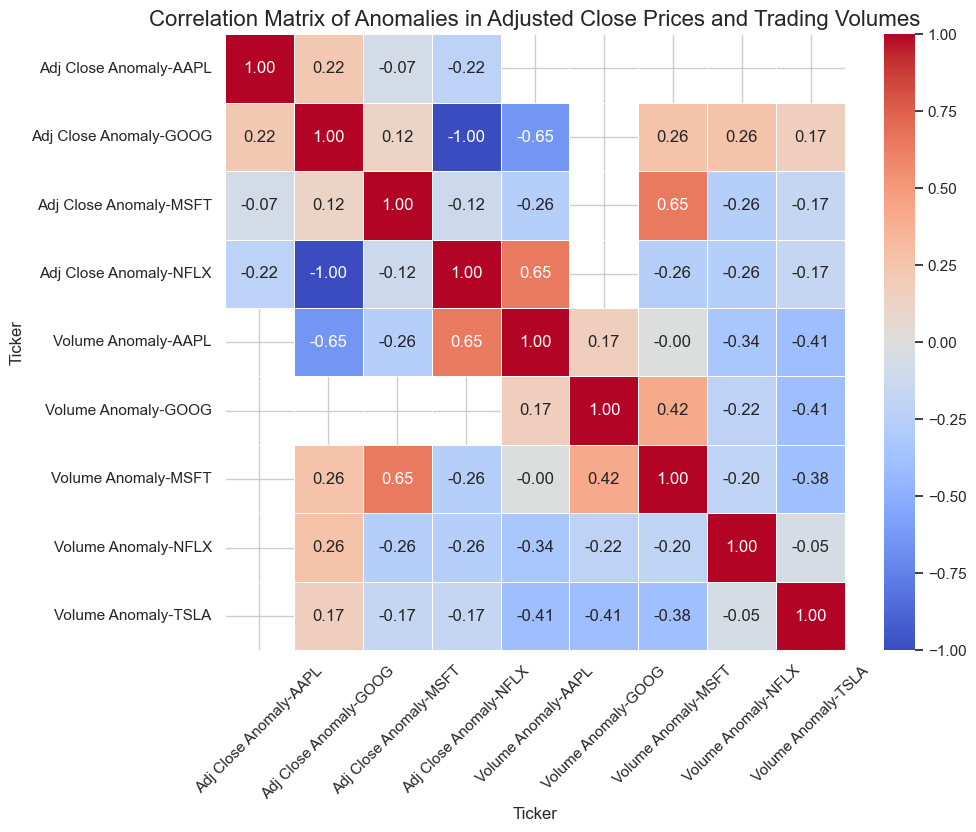

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Anomalies in Adjusted Close Prices and Trading Volumes', fontsize=16)
plt.xlabel('Ticker', fontsize=12)
plt.ylabel('Ticker', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


# Evaluating Anomaly Risk.

In assessing the risk associated with anomalies detected in stock data, it's crucial to consider both their frequency and magnitude. By examining these factors, we can gauge the potential risk posed by each stock and make informed decisions regarding investment strategies.

**Frequency of Anomalies**: A higher frequency of anomalies within a stock's data may indicate a greater level of risk. Stocks experiencing frequent anomalies are prone to sudden price fluctuations or irregular trading volumes, which could signal underlying instability or uncertainty in the market.

**Magnitude of Anomalies**: The magnitude of anomalies, represented by the absolute Z-scores, provides insight into the extent of deviation from the mean. Larger absolute Z-scores suggest more significant deviations and, consequently, heightened risk. Stocks with substantial anomalies may experience more pronounced price volatility or erratic trading behavior, posing increased risks to investors.

To quantify the risk for each stock, we can compute a risk score by combining these factors. One approach involves averaging the absolute Z-scores of anomalies for each stock and normalizing these scores across all stocks. This normalization process enables a comparative assessment of risk levels across different stocks, allowing investors to prioritize their investment decisions based on the perceived level of risk associated with each stock.

In [42]:
# calculate the mean absolute Z-score for each stock as a risk indicator
adj_close_risk = anomalies_adj_close.groupby('Ticker')['Z-score'].apply(lambda x: abs(x).mean())
volume_risk = anomalies_volume.groupby('Ticker')['Z-score'].apply(lambda x: abs(x).mean())

# combine the risk scores from both price and volume anomalies
total_risk = adj_close_risk + volume_risk

# normalize the risk scores to get a relative risk rating from 0 to 1
risk_rating = (total_risk - total_risk.min()) / (total_risk.max() - total_risk.min())

print(risk_rating)

Ticker
AAPL    0.173652
GOOG    0.063253
MSFT    0.000000
NFLX    1.000000
TSLA         NaN
Name: Z-score, dtype: float64


### **Interpretation of Risk Ratings:**

- **AAPL (Apple Inc.):** The risk rating of approximately 0.17 suggests that Apple's stock exhibits some level of risk due to anomalies, although it is relatively moderate compared to others like NFLX. Investors should remain cautious, but the risk is not as pronounced as with certain other stocks.

- **GOOG (Alphabet Inc.):** With a risk rating of around 0.06, GOOG appears to be less risky compared to AAPL. This indicates fewer or less significant anomalies in its trading data, offering investors a relatively stable investment option.

- **MSFT (Microsoft Corporation):** MSFT shows a risk rating of 0.00, indicating the least risk among the listed stocks. This suggests that Microsoft had the fewest and smallest anomalies in its price and volume data, making it a relatively safe investment choice.

- **NFLX (Netflix, Inc.):** With the highest risk rating of 1.00, NFLX is deemed the most risky among these stocks. This indicates the presence of frequent and large anomalies, making Netflix a high-risk investment option that may not be suitable for all investors.

- **TSLA (Tesla, Inc.):** The NaN value suggests that TSLA did not have detectable anomalies in the period analyzed. While this may indicate a lack of significant anomalies, investors should exercise caution and conduct further analysis to assess the stock's risk profile accurately.

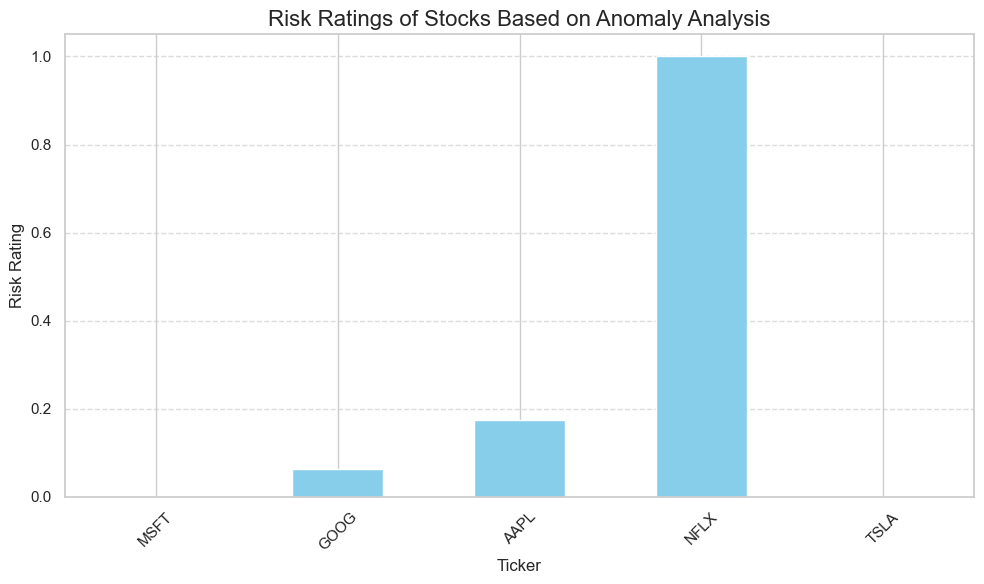

In [41]:
import matplotlib.pyplot as plt

# Plotting the risk ratings
plt.figure(figsize=(10, 6))
risk_rating.sort_values().plot(kind='bar', color='skyblue')
plt.title('Risk Ratings of Stocks Based on Anomaly Analysis', fontsize=16)
plt.xlabel('Ticker', fontsize=12)
plt.ylabel('Risk Rating', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Project Overview:

The **Python Equity Market Outlier Detection Framework** provides a **robust methodology** for detecting **anomalies** in **stock market data**, offering valuable insights for **investors** and **analysts**. Leveraging **real-time data collection**, **statistical analysis**, **visualization techniques**, and **correlation analysis**, the framework enables users to identify **irregular patterns** or **behaviors** in **stock prices** and **trading volumes**.

Key Features:
1. **Real-time Data Collection**: Utilizing the **yfinance API**, the framework gathers **real-time stock market data** for multiple companies, including attributes such as **adjusted close prices**, **trading volumes**, and other relevant metrics.

2. **Data Visualization**: **Visualization techniques**, including **line plots** and **scatter plots**, are employed to visualize **adjusted close prices** and **trading volumes** over time. These visualizations aid in identifying potential **anomalies** and understanding **historical trends** in market activity.

3. **Anomaly Detection**: **Anomalies** in **adjusted close prices** and **trading volumes** are detected using **statistical methods** such as **Z-score analysis**. By setting thresholds for **anomalies** based on **standard deviations** from the mean, the framework highlights **significant deviations** from expected behavior.

4. **Correlation Analysis**: **Anomalies** across different stocks are consolidated, and a **correlation matrix** is computed to analyze relationships between **anomalies**. This analysis provides insights into **interconnected behaviors** within the stock market, enabling users to understand market dynamics more comprehensively.

5. **Risk Evaluation**: **Risk ratings** are calculated based on the **frequency** and **magnitude** of **anomalies** detected for each stock. These ratings assist **investors** in assessing the **risk associated** with individual stocks and making informed **investment decisions**.

Market Impact:
- **Enhanced Decision-making**: The framework equips **investors** and **analysts** with powerful tools for detecting, analyzing, and interpreting **anomalies** in stock market data. By providing insights into **irregularities** and **market dynamics**, it enables users to make more informed **investment decisions**.
- **Improved Risk Management**: By evaluating the **frequency** and **magnitude** of **anomalies**, the framework helps **investors** assess the **risk associated** with individual stocks. This enables better **risk management** and the development of more robust **investment strategies**.
- **Market Transparency**: By uncovering **irregular patterns** or **behaviors** in **stock prices** and **trading volumes**, the framework contributes to **market transparency**. This allows stakeholders to better understand **market dynamics** and anticipate potential fluctuations in **stock prices**.

Overall, the **Python Equity Market Outlier Detection Framework** brings valuable capabilities to the market, empowering **investors** and **analysts** with the tools and insights needed to navigate the complexities of the **stock market** effectively.